In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.decomposition import PCA

In [61]:
# Check PCA calculations later; strong correlation, but not perfect

In [2]:
norm_tpm = pd.read_csv('tables/scone_norm_tpm.tab.gz', sep='\t', index_col=0)

discard = [x for x in sorted(norm_tpm.index) if ((x[:3] in ['mt-', 'Gm0', 'Gm1', 'Gm2', 'Gm3', 'Gm4', 'Gm5', 
                                                           'Gm6', 'Gm7', 'Gm8', 'Gm9', 'Mir']) or (x[-3:] in ['Rik', '-ps']) or (x [-4:-1] == '-ps')) or (x[:4] == 'ERCC')]

good_genes = [x for x in norm_tpm.index if x not in discard]

norm_tpm = norm_tpm.loc[good_genes]

In [3]:
pca_norm_chen = PCA(n_components=30)
pca_norm_chen = pca_norm_chen.fit_transform(norm_tpm.T)

Text(0, 0.5, 'PC 2')

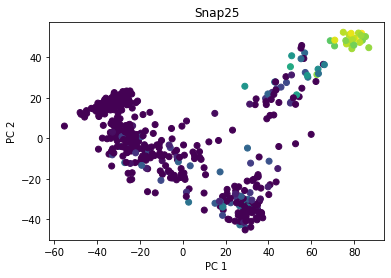

In [4]:
high_expression = norm_tpm.index[norm_tpm.mean(axis=1) > -1]
fano = (norm_tpm.loc[high_expression].var(axis=1)/norm_tpm.loc[high_expression].mean(axis=1)).sort_values()

pca_norm_chen = PCA(n_components=2)
pca_norm_chen = pca_norm_chen.fit_transform(norm_tpm.loc[fano.index[-100000:]].T)
plt.scatter(pca_norm_chen.T[0], pca_norm_chen.T[1], c=norm_tpm.loc['Snap25'])
plt.title('Snap25')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [5]:
from sklearn.preprocessing import StandardScaler

high_expression = norm_tpm.index[norm_tpm.mean(axis=1) >= 0.1]
fano = (norm_tpm.loc[high_expression].var(axis=1)/norm_tpm.loc[high_expression].mean(axis=1)).sort_values()
pca_norm_tiklova = PCA(n_components=30)

scaled_counts = pd.DataFrame(StandardScaler().fit_transform(norm_tpm.loc[fano.index[-1000:]].T).T,
                             index = fano.index[-1000:], columns = norm_tpm.columns)

# pca_norm_tiklova = pca_norm_tiklova.fit(norm_tpm.loc[var_genes & norm_tpm.index].T)

# pca_norm_tiklova = pca_norm_tiklova.fit_transform(norm_tpm.loc[var_genes & norm_tpm.index].T)

pca_norm_tiklova = pca_norm_tiklova.fit_transform(scaled_counts.T)


rd = pd.DataFrame()
for i in range(30):
    rd['PC_' + str(i+1)] = pca_norm_tiklova.T[i]

rd.index = norm_tpm.columns


In [6]:
meta = pd.read_csv('../SraRunTable.txt.gz', sep='\t', index_col=5)


In [7]:
meta.loc[rd.index].cell_type_s.unique()

array(['ES2i', 'ES', 'Epi', 'Motor neuron'], dtype=object)

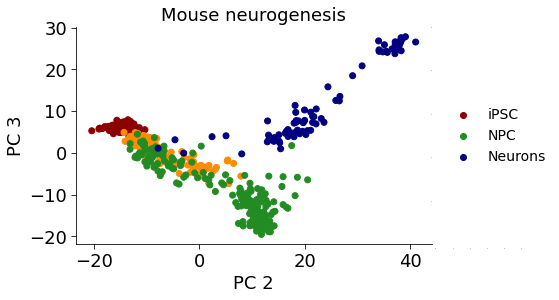

In [8]:
from matplotlib import pyplot as plt
colores = []
for cell in meta.loc[rd.index].cell_type_s:
    if cell == 'ES2i':
        colores.append('darkred')
    if cell == 'ES':
        colores.append('darkorange')
    if cell == 'Epi':
        colores.append('forestgreen')
    if cell == 'Motor neuron':
        colores.append('navy')
        
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4])
ax.scatter(rd.PC_1, rd.PC_2, c=colores)
ax.tick_params(labelsize=18, length=5)
ax.set_title('Mouse neurogenesis', fontsize=18)
ax.set_xlabel('PC 2', fontsize=18)
ax.set_ylabel('PC 3', fontsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.scatter([-1], [0], c='darkred', label='iPSC')
ax_2.scatter([0], [0], c='forestgreen', label='NPC')
ax_2.scatter([0], [0], c='navy', label='Neurons')
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.tick_params(labelsize=0, length=0, which='both')
ax_2.set_xlim([2, 3])
ax_2.set_ylim([2, 3])
ax_2.legend(frameon=False, fontsize=14, loc='center left')

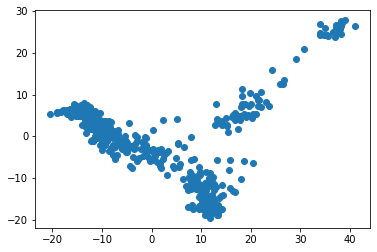

In [16]:
plt.scatter(rd.PC_1, rd.PC_2)

In [9]:
# rd[['PC_1', 'PC_2']].to_csv('tables/pc2_rd.tab.gz', sep='\t', index=True, header=True)

# SE = pd.read_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index_col=0)[rd.index]
# SE.to_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index=True, header=True)

# tpm = pd.read_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index_col=0)[rd.index]
# tpm.to_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index=True, header=True)

# CI = pd.read_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index_col=0)[rd.index]
# CI.to_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index=True, header=True)

In [9]:
rd = pca_norm_chen

In [10]:
rd

array([[-2.58306923e+01,  2.25198319e+01],
       [-2.56534072e+01,  1.83831170e+01],
       [-2.46572494e+01,  2.34053105e+01],
       [-2.81191196e+01,  2.09510534e+01],
       [-2.11336463e+01,  1.84083450e+01],
       [-2.44317004e+01,  1.76950203e+01],
       [-2.87529125e+01,  1.68103440e+01],
       [-3.22524583e+01,  2.01002794e+01],
       [-2.58235927e+01,  2.31493575e+01],
       [-3.59413647e+01,  1.98398009e+01],
       [-3.06360126e+01,  1.61124777e+01],
       [-2.38574740e+01,  2.18940134e+01],
       [-3.08048409e+01,  1.89218294e+01],
       [-2.54591985e+01,  1.67240952e+01],
       [-3.23535706e+01,  1.41467481e+01],
       [-3.42125704e+01,  1.82885958e+01],
       [-3.07751141e+01,  1.80350266e+01],
       [-3.34453826e+01,  1.74549437e+01],
       [-2.69537935e+01,  1.83529146e+01],
       [-3.27936167e+01,  1.88286098e+01],
       [-3.19744713e+01,  1.90051904e+01],
       [-2.79569919e+01,  2.19618516e+01],
       [-2.95028228e+01,  1.81237462e+01],
       [-3.

In [ ]:
rd[['PC_1', 'PC_2']].to_csv('tables/pc2_rd.tab.gz', sep='\t', index=True, header=True)

SE = pd.read_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index_col=0)[rd.index]
SE.to_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index=True, header=True)

tpm = pd.read_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index_col=0)[rd.index]
tpm.to_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index=True, header=True)

CI = pd.read_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index_col=0)[rd.index]
CI.to_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index=True, header=True)

In [41]:
old_pca = pd.read_csv('~/data_sc_regulation/data_autocorrelation/chen/rd_pc2.tab', sep='\t', index_col=0)

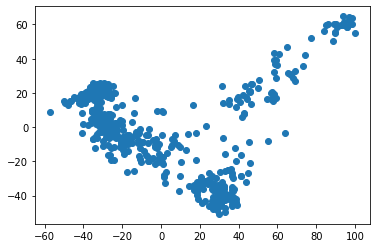

In [48]:
plt.scatter(old_pca.PC_1, old_pca.PC_2)

In [49]:
older_pca = pd.read_csv('~/sc_binary_splicing/data/chen/chen.pca.tab.gz', sep='\t', index_col=0)

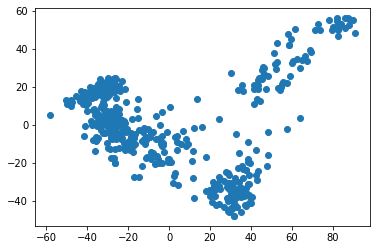

In [52]:
plt.scatter(older_pca.PC1, -older_pca.PC2)

In [ ]:
## Check PCA calculation later; correlation is strong but not perfect

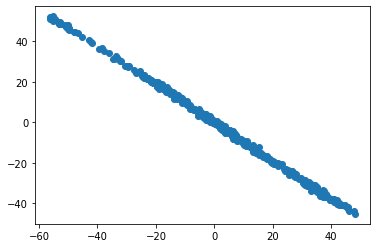

In [60]:
plt.scatter(older_pca.PC2, pca_norm_tiklova.T[1])